Aluno: Fernanda Midori Abukawa

nº USP: 9797594

Disciplina: IBI5031 - 2º semestre de 2020

Prof: Marcelo da Silva Reis

Lista 1

utilizados: python3, anaconda3, jupyter notebooks v6.0, macOS

### Exercício 2b e 2c

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

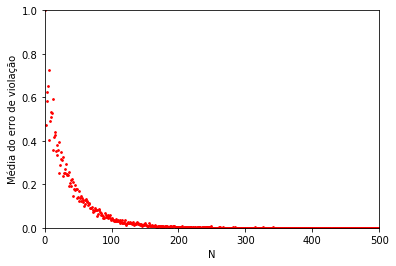

In [27]:
#for u = 0.57
u = 0.57
N = 1000
ns = []
erros = []
for i in range(1,N): 
    violou = 0
    K = 1000
    for k in range(K): 
        v = np.random.binomial(1, 0.57, i)
        v = sum(v)/i
        violou = violou + int(abs(v - u) > 0.1)
        erro = violou/K
    ns.append(i)
    erros.append(erro)
        
plt.xlim(0,500)
plt.ylim(0,1)
plt.scatter(ns, erros, c = 'red', s = 3)
plt.xlabel('N')
plt.ylabel('Média do erro de violação')
plt.show()

Como visto no exercício 2a, o N necessário para que a inequalidade seja respeitada é de aproximadamente 185 amostras. 

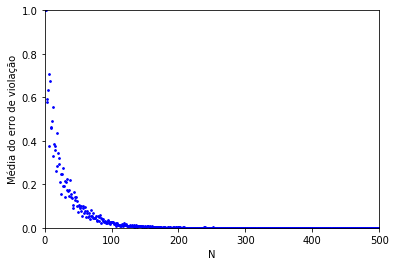

In [3]:
#for u = 0.26
u = 0.26
N = 1000
ns = []
erros = []
for i in range(1,N): 
    violou = 0
    K = 1000
    for k in range(K): 
        v = np.random.binomial(1, 0.26, i)
        v = sum(v)/i
        violou = violou + int(abs(v - u) > 0.1)
        erro = violou/K
    ns.append(i)
    erros.append(erro)
        
plt.xlim(0,500)
plt.ylim(0,1)
plt.scatter(ns, erros, c = 'blue', s = 3)
plt.xlabel('N')
plt.ylabel('Média do erro de violação')
plt.show()

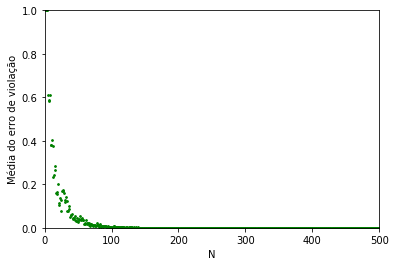

In [4]:
#for u = 0.14
u = 0.14
N = 1000
ns = []
erros = []
for i in range(1,N): 
    violou = 0
    K = 1000
    for k in range(K): 
        v = np.random.binomial(1, 0.14, i)
        v = sum(v)/i
        violou = violou + int(abs(v - u) > 0.1)
        erro = violou/K
    ns.append(i)
    erros.append(erro)
        
plt.xlim(0,500)
plt.ylim(0,1)
plt.scatter(ns, erros, c = 'green', s = 3)
plt.xlabel('N')
plt.ylabel('Média do erro de violação')
plt.show()

Conforme ocorre diminuição do valor de u, ocorre um deslocamento da curva para a esquerda. O que indica que precisa de menos amostra (N) para que a inequalidade seja respeitada. A interpretação do resultado é que a chance da moeda cair em cara é tão pequena, que necessita de menos amostras para que a proporção seja replicada fora da amostra. Já quando temos uma moeda que quase não é viciada (u = 0.57), precisa de mais amostras para que a inequalidade seja respeitada, porque a chance de ocorrer um pequeno desvio dessa proporção (por exemplo de cair mais coroas em vez de caras) é maior e portanto, precisa de um N maior para realmente garantir a proporção fora da amostra. 

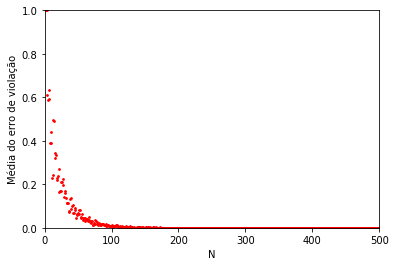

In [26]:
#for u = 0.82
u = 0.82
N = 1000
ns = []
erros = []
for i in range(1,N): 
    violou = 0
    K = 1000
    for k in range(K): 
        v = np.random.binomial(1, 0.82, i)
        v = sum(v)/i
        violou = violou + int(abs(v - u) > 0.1)
        erro = violou/K
    ns.append(i)
    erros.append(erro)
        
plt.xlim(0,500)
plt.ylim(0,1)
plt.scatter(ns, erros, c = 'red', s = 3)
plt.xlabel('N')
plt.ylabel('Média do erro de violação')
plt.show()

Nesse caso, é como o caso de um baixo u, só que a situação inversa já que o u nesse caso é bem alto. Ou seja, a chance de cair em cara é tão alta que o N necessário para a violação ser menor que 0.1 será menor também.

### Exercício 3

Antes de tudo, rodar a célula logo abaixo. 
Nela tem a importação de todos os pacotes necessários, além da definição das 3 classes do conjunto de dados Iris. 
As variáveis A, B e C serão utilizadas para criar os subconjuntos do ex.3b. 

In [6]:
#run this cell before everything
from sklearn import datasets
import numpy as np
import random 
import statistics 

#import dataset iris and separate then by classes 
iris = datasets.load_iris()

#X = iris.data
Y = iris.target

#first class 0
A = iris.data[:50, :] 
yA = iris.target[:50]

#second class 1
B = iris.data[50:100, :]
yB = iris.target[50:100]

#third class 2
C = iris.data[100:150, :]
yC = iris.target[100:150]

A próxima célula corresponde ao algoritmo PLA versão pocket (exercício 3a). 

A função da hipótese utiliza os pesos da iteração corrente para gerar a classificação -1 ou +1. Os pesos se iniciam com 0. Para mudar os parâmetros de parada, escolha um valor para o máximo de iterações e coloque na variável N. 

A PLA retorna o peso escohido para g(x). Caso o PLA atinga 100% de acertos preditos, ele retorna o peso dessa iteração. Caso não atinga 1.0, ele retorna o peso da iteração com a melhor proporção de acertos. 

In [ ]:
#the hypothesis function 
def hyp_func(x):
    out = np.sign(w[0]*x[0] + w[1]*x[1] + w[2]*x[2] + w[3]*x[3] + w[4]*x[4])
    if out == 1:
        return(1)
    elif out == 0:
        return(1)
    else: 
        return(-1)
    
w = np.array([0, 0, 0, 0, 0])
iterations = 0 
N = 1000    #maximun number of iterations given by you 
mis = []    #misclassified points 
acc = []   
it = []    
last_best_prop = 0 
bacc = []

while iterations <= N:
    correct = 0 
    wrong = 0
    for (x,y) in zip(xs,ys):
        if hyp_func(x) != y:
            mis.append((np.array([x[0], x[1], x[2], x[3], x[4]]), y))
            wrong +=1
        else: correct +=1
    prop_correct = correct/(wrong+correct) #proportion of corrects in this iteration
    acc.append(prop_correct)               #append proportion of corrects in every iteration
    
    #if accuracy reaches 1.0 it stops and saves the weight of current iteration
    if prop_correct == 1.0:
        #bw = best weight
        bw = w  
        #bi = iteration of best weight
        bi = iterations
        break

    #if actual proportion of corrects is greater then of last iteration, update best weight 
    if prop_correct > last_best_prop:
        bw = w
        bi = iterations  
        last_best_prop = prop_correct
    
    #if mis have misclassified points then random point is chosen to update the weights
    if len(mis) > 0:
        iterations +=1       
        x,y = random.choice(mis)
        w = w +y*x #update weights 

print('weight if g(x): ', bw)
print('iteration of best weight: ' , bi)
per_correct = acc[bi]*100
ein = 100 - per_correct
print('percentage of corrects: ', per_correct)
print('error in sample Ein (percentage): ', ein )

As próximas 3 células correspondem aos 3 subconjuntos do exercício 3b junto com o PLA do exercício 3a. 

1 - subconjunto com as classes 0 e 1 

2 - subconjunto com as classes 0 e 2 

3 - subconjunto com as classes 1 e 2

Para rodar o exercício, escolha um dos subconjuntos e rode a célula correspondente.

In [7]:
#creating the dataset for first subset (classes 0 and 1)
#class 0 = A and class 1 = B 

g1 = np.random.uniform(1,1, (50,6))
g1[:,1] = A[:,0]
g1[:,2] = A[:,1]
g1[:,3] = A[:,2]
g1[:,4] = A[:,3]
g1[:,5] = 1.0     #label          

g2 = np.random.uniform(1,1, (50,6))
g2[:,1] = B[:,0]
g2[:,2] = B[:,1]
g2[:,3] = B[:,2]
g2[:,4] = B[:,3]
g2[:,5] = -1.0              

dataset = np.vstack((g1,g2)) #join both classes together     
ys = dataset[:,5]            #the labels = ys
xs = dataset[:,0:5]          #the xs (with x0 = 1 and 4 features)

#PLA pocket 
def hyp_func(x):
    out = np.sign(w[0]*x[0] + w[1]*x[1] + w[2]*x[2] + w[3]*x[3] + w[4]*x[4])
    if out == 1:
        return(1)
    elif out == 0:
        return(1)
    else: 
        return(-1)
    
w = np.array([0, 0, 0, 0, 0])
iterations = 0 
N = 1000    
mis = []   
acc = []   
it = []    
last_best_prop = 0 
bacc = []

while iterations <= N:
    correct = 0 
    wrong = 0
    for (x,y) in zip(xs,ys):
        if hyp_func(x) != y:
            mis.append((np.array([x[0], x[1], x[2], x[3], x[4]]), y))
            wrong +=1
        else: correct +=1
    prop_correct = correct/(wrong+correct) 
    acc.append(prop_correct)               
    
    if prop_correct == 1.0:
        bw = w  
        bi = iterations
        break

    if prop_correct > last_best_prop:
        bw = w
        bi = iterations  
        last_best_prop = prop_correct
    
    if len(mis) > 0:
        iterations +=1       
        x,y = random.choice(mis)
        w = w +y*x 
        
w_g1 = bw 

print('weight if g(x): ', bw)
print('iteration of best weight: ' , bi)
per_correct = acc[bi]*100
ein = 1 - acc[bi]
print('percentage of corrects: ', per_correct)
print('error in sample Ein: %.3f ' % ein )

weight if g(x):  [  3.    4.7  14.3 -22.6  -9.9]
iteration of best weight:  21
percentage of corrects:  100.0
error in sample Ein: 0.000 


In [10]:
#creating the dataset for second subset (classes 0 and 2)
#class 0 = A and class 2 = C 

g1 = np.random.uniform(1,1, (50,6))
g1[:,1] = A[:,0]
g1[:,2] = A[:,1]
g1[:,3] = A[:,2]
g1[:,4] = A[:,3]
g1[:,5] = 1.0  

g2 = np.random.uniform(1,1, (50,6))
g2[:,1] = C[:,0]
g2[:,2] = C[:,1]
g2[:,3] = C[:,2]
g2[:,4] = C[:,3]
g2[:,5] = -1.0 

dataset = np.vstack((g1,g2))  
ys = dataset[:,5]            
xs = dataset[:,0:5]          

#PLA pocket

def hyp_func(x):
    out = np.sign(w[0]*x[0] + w[1]*x[1] + w[2]*x[2] + w[3]*x[3] + w[4]*x[4])
    if out == 1:
        return(1)
    elif out == 0:
        return(1)
    else: 
        return(-1)
    
w = np.array([0, 0, 0, 0, 0])
iterations = 0 
N = 1000     
mis = []   
acc = []   
it = []    
last_best_prop = 0 
bacc = []

while iterations <= N:
    correct = 0 
    wrong = 0
    for (x,y) in zip(xs,ys):
        if hyp_func(x) != y:
            mis.append((np.array([x[0], x[1], x[2], x[3], x[4]]), y))
            wrong +=1
        else: correct +=1
    prop_correct = correct/(wrong+correct) 
    acc.append(prop_correct)               
    
    if prop_correct == 1.0:
        bw = w  
        bi = iterations
        break

    if prop_correct > last_best_prop:
        bw = w
        bi = iterations  
        last_best_prop = prop_correct
    
    if len(mis) > 0:
        iterations +=1       
        x,y = random.choice(mis)
        w = w +y*x 

w_g2 = bw

print('weight if g(x): ', bw)
print('iteration of best weight: ' , bi)
per_correct = acc[bi]*100
ein = 1 - acc[bi]
print('percentage of corrects: ', per_correct)
print('error in sample Ein: %.3f ' % ein )

weight if g(x):  [  2.    5.6  11.2 -14.1  -7.1]
iteration of best weight:  10
percentage of corrects:  100.0
error in sample Ein: 0.000 


In [11]:
#creating the dataset for third subset (classes 1 and 2)
#class 1 = B and class 2 = C 
g1 = np.random.uniform(1,1, (50,6))
g1[:,1] = B[:,0]
g1[:,2] = B[:,1]
g1[:,3] = B[:,2]
g1[:,4] = B[:,3]
g1[:,5] = 1.0 

g2 = np.random.uniform(1,1, (50,6))
g2[:,1] = C[:,0]
g2[:,2] = C[:,1]
g2[:,3] = C[:,2]
g2[:,4] = C[:,3]
g2[:,5] = -1.0 

dataset = np.vstack((g1,g2))    
ys = dataset[:,5]            
xs = dataset[:,0:5]          

#PLA pocket

def hyp_func(x):
    out = np.sign(w[0]*x[0] + w[1]*x[1] + w[2]*x[2] + w[3]*x[3] + w[4]*x[4])
    if out == 1:
        return(1)
    elif out == 0:
        return(1)
    else: 
        return(-1)
    
w = np.array([0, 0, 0, 0, 0])
iterations = 0 
N = 1000    
mis = []    
acc = []   
it = []    
last_best_prop = 0 
bacc = []

while iterations <= N:
    correct = 0 
    wrong = 0
    for (x,y) in zip(xs,ys):
        if hyp_func(x) != y:
            mis.append((np.array([x[0], x[1], x[2], x[3], x[4]]), y))
            wrong +=1
        else: correct +=1
    prop_correct = correct/(wrong+correct) 
    acc.append(prop_correct)               
    
    if prop_correct == 1.0:
        bw = w  
        bi = iterations
        break

    if prop_correct > last_best_prop:
        bw = w
        bi = iterations  
        last_best_prop = prop_correct
    
    if len(mis) > 0:
        iterations +=1       
        x,y = random.choice(mis)
        w = w +y*x 

w_g3 = bw

print('weight if g(x): ', bw)
print('iteration of best weight: ' , bi)
per_correct = acc[bi]*100
ein = 1 - acc[bi]
print('percentage of corrects: ', per_correct)
print('error in sample Ein: %.3f ' % ein )

weight if g(x):  [  43.    98.6   74.5 -137.7 -114.8]
iteration of best weight:  533
percentage of corrects:  98.0
error in sample Ein: 0.020 


No caso para a separação das classes (0,1) e (0,2) o PLA converge para 1.0 mostrando que eles são linearmente separáveis e no caso do (1,2) a acurácia máxima fica em torno de 0.96-0.98, o que mostra que não é completamente separável. 

### Exercício 3c

Para o exercício 3c, rodar as 3 células acima para obter os 3 classificadores (ou seja os 3 pesos obtidos nos Perceptrons separados g1, g2 e g3). 

In [24]:
wrongs = []
acc = []

#Create dataset with 150 points
I = np.concatenate((A,B,C), axis=0)
X = np.random.uniform(1,1, (150,5))
X[:,1] = I[:,0]
X[:,2] = I[:,1]
X[:,3] = I[:,2]
X[:,4] = I[:,3]

#Y is iris.target!

N = 1000
for i in range(N):
    g1s = []
    g2s = []
    g3s = []
    
    w = w_g1
    for (x,y) in zip(X,Y):
        h = 0
        if hyp_func(x) == 1: h = 0 #A was labeled +1
        elif hyp_func(x) == 0: h = 0 
        else: h = 1 #B was labeled -1 
        g1s.append(h)
    
    w = w_g2
    for (x,y) in zip(X,Y):
        h = 0
        if hyp_func(x) == 1: h = 0 #A = +1
        elif hyp_func(x) == 0: h = 0 
        else: h = 2 #C = -1
        g2s.append(h)
    
    w = w_g3
    for (x,y) in zip(X,Y):
        h = 0
        if hyp_func(x) == 1: h = 1 #B = 1
        elif hyp_func(x) == 0: h = 1 
        else: h = 2 #C = -1
        g3s.append(h)
    
    #G = array with predictions of 3 PLAs
    G = np.zeros((150,3))
    G[:,0] = g1s
    G[:,1] = g2s
    G[:,2] = g3s
    
    gs = []
    for j in range(len(G)):
        l = len(np.unique(G[j]))
        if l <= 2:
            gs.append(statistics.mode(G[j]))
        else: 
            gs.append(np.random.randint(low=0,high=3))
    
    correct = 0
    wrong = 0
    for f in range(len(gs)):
        if gs[f] == Y[f]:
            correct +=1
        else: 
            wrong +=1 
    acc.append(correct/(correct+wrong))
    wrongs.append(wrong/(correct+wrong))
    
acc_total = sum(acc)/len(acc)
print("Mean of proportion of corrects: %.3f" % acc_total)
Ein = sum(wrongs)/N
print("mean of error in sample: %.3f" % Ein)

Mean of proportion of corrects: 0.987
mean of error in sample: 0.013


In [ ]:
#verificação
print(X,Y)         #verificar os datasets
print(g1s,g2s,g3s) #são as classificações de cada percetron separado
print(G,gs)        #gs é a moda de cada linha de G, se tiver e um valor aleatório se não 
print(acc)         #proporção de acertos em cada rodada

A média de 1000 experimentos ficou em torno de 0.98 de corretos e 0.02 de Ein, mostrando que utilizar a estratégia da moda dos 3 resultados funciona bem para separar os 3 grupos com 3 perceptrons. 